<a href="https://colab.research.google.com/github/estebanvz/redes_neuronales_pytorch/blob/aula-5/Redes_Neuronales_Deep_Learning_con_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura - Redes Neuronales: Deep Learning con PyTorch

## Pytorch vs Numpy

In [ ]:
TAMANO=1000000000

In [ ]:
import numpy as np
def funcion_activacion(x):
  if(x>=0.0):
    return 1
  else:
    return 0
class Perceptron():
  def __init__(self, datos_entrada):
    self.datos_entrada = np.array(datos_entrada)
    self.pesos = np.array([1.0,-1.0,1.0]*TAMANO)
  def forward(self,):
    self.datos_salida = self.datos_entrada @ self.pesos
    return funcion_activacion(self.datos_salida)


In [ ]:
%%time
datos_entrada = [0.22,0.170,0.80]*TAMANO
perceptron = Perceptron(datos_entrada)
prediccion = perceptron.forward()
prediccion

In [ ]:
import torch
gpu = torch.device("cuda")
class PerceptronTorch():
  def __init__(self, datos_entrada):
    self.datos_entrada = torch.tensor(datos_entrada).to(gpu)
    self.pesos = torch.tensor([1.0,-1.0,1.0]*TAMANO).to(gpu)
  def forward(self,):
    self.datos_salida = self.datos_entrada @ self.pesos
    return funcion_activacion(self.datos_salida)

In [ ]:
%%time
datos_entrada = [0.22,0.170,0.80]*TAMANO
perceptron = PerceptronTorch(datos_entrada)
prediccion = perceptron.forward()
prediccion

## Operaciones con tensores

In [ ]:
import torch
torch.rand(size=(5,2)).double()

In [ ]:
pesos = torch.tensor([1.0,1.0,1.0])
tmp = torch.rand(size=(5,3))
tmp

In [ ]:
tmp @ pesos

In [ ]:
pesos = torch.tensor([[1.0,1.0,1.0]]).T
torch.mm(tmp,pesos)

In [ ]:
torch.mm(tmp,pesos) + torch.ones(size=(5,1))*2

## MLP


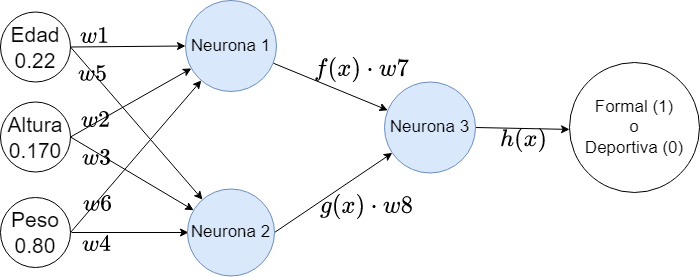

In [ ]:
import torch
import torch.nn as nn
class MLP(nn.Module):
  def __init__(self, dim_1,dim_2,dim_3):
    super(MLP,self).__init__()
    self.capa1 = nn.Linear(dim_1,dim_2) ## dim_1 -> dimensión de los datos de entrada
    self.capa2 = nn.Linear(dim_2,dim_3) ## dim_2 -> dimensión de los datos de la primera capa
  def forward(self, data):
    resultado_capa1 = self.capa1(data) ## tmp = data @ pesos_capa1
    resultado_capa2 = self.capa2(resultado_capa1) ## tmp = tmp @ pesos_capa2
    return resultado_capa2


In [ ]:
mlp = MLP(dim_1=3,dim_2=2,dim_3=1).to("cuda")

In [ ]:
data =torch.tensor([10.0,1.0,1.0])
mlp.forward(data)

## Previsión de demanda

## Librerias

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

In [2]:
data_train = pd.read_parquet("/content/dataset_train.parquet")
data_train.tail()

,date,t-4,t-3,t-2,t-1,sales
1760,2022-10-27,64,68,68,67,85
1761,2022-10-28,68,68,67,85,101
1762,2022-10-29,68,67,85,101,90
1763,2022-10-30,67,85,101,90,70
1764,2022-10-31,85,101,90,70,80


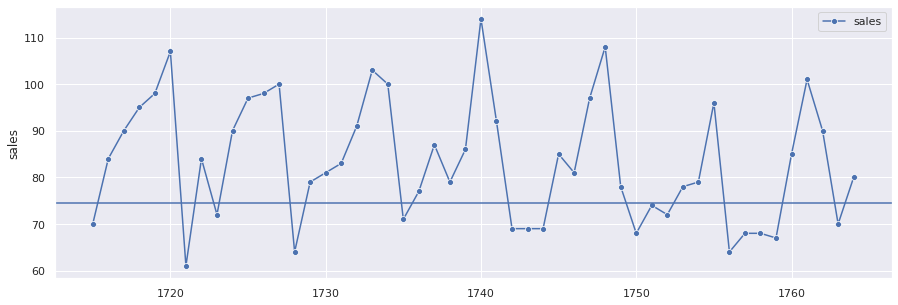

In [3]:
sns.lineplot(data=data_train["sales"][-50:],label="sales",marker="o").axhline(data_train["sales"].mean())
# sns.lineplot(data=data_train["t-4"][-50:],label="t-2",marker="o")

### Modelos

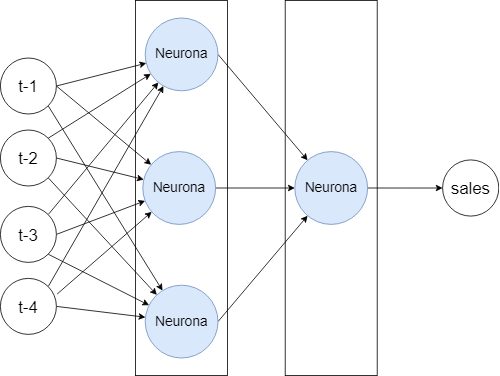

In [ ]:
class MLP_01(nn.Module):
  def __init__(self,):
    super(MLP_01,self).__init__()
    self.l1 = nn.Linear(4,3)
    self.l2 = nn.Linear(3,1)
  def forward(self,data):
    r1 = self.l1(data)
    r2 = self.l2(r1)
    return r2
class MLP_02(nn.Module):
  def __init__(self,):
    super(MLP_02,self).__init__()
    self.l1 = nn.Linear(4,8)
    self.l2 = nn.Linear(8,1)
  def forward(self,data):
    r1 = self.l1(data)
    r2 = self.l2(r1)
    return r2
class MLP_03(nn.Module):
  def __init__(self,):
    super(MLP_03,self).__init__()
    self.l1 = nn.Linear(4,8)
    self.l2 = nn.Linear(8,1)
  def forward(self,data):
    r1 = self.l1(data)
    r1 = torch.relu(r1)
    r2 = self.l2(r1)
    r2 = torch.relu(r2)
    return r2
class MLP_03(nn.Module):
  def __init__(self,):
    super(MLP_03,self).__init__()
    self.l1 = nn.Linear(4,8)
    self.l2 = nn.Linear(8,1)
  def forward(self,data):
    r1 = self.l1(data)
    r1 = torch.relu(r1)
    r2 = self.l2(r1)
    r2 = torch.relu(r2)
    return r2
class MLP_04(nn.Module):
  def __init__(self,):
    super(MLP_04,self).__init__()
    self.l1 = nn.Linear(4,254)
    self.l2 = nn.Linear(254,32)
    self.l3 = nn.Linear(32,1)
  def forward(self,data):
    r1 = self.l1(data)
    r1 = torch.relu(r1)
    r2 = self.l2(r1)
    r2 = torch.relu(r2)
    r3 = self.l3(r2)
    r3 = torch.relu(r3)
    return r3

In [78]:
def pd_tensor(data,sales):
  if(type(data)==pd.DataFrame):
    data =  data.values
    sales =  sales.values
  if(type(data)==np.ndarray):
    data = torch.tensor(data, dtype=torch.float32)
    sales = torch.tensor(sales, dtype=torch.float32)
    sales = torch.reshape(sales,(-1,1))
  return data, sales
def train_model(model:nn.Module,data,sales,epocas=20):
  datav, salesv = pd_tensor(data[-100:],sales[-100:])
  data, sales = pd_tensor(data[:-100],sales[:-100])

  loss_array = []
  lossv_array= []
  criterio = nn.L1Loss()
  optimizador = torch.optim.Adam(model.parameters(), lr=0.01)
  dataset = TensorDataset(data, sales)
  for i in range(epocas):
    loader = DataLoader(dataset, batch_size=254, shuffle=False)
    loss_total=0.0
    model.train()
    for (b_data,b_sales) in loader:
      resultados = model(b_data)
      loss = criterio(b_sales,resultados)
      loss_total+=loss.item()
      optimizador.zero_grad()
      loss.backward()
      optimizador.step()
    model.eval()
    resultados = model(datav)
    loss = criterio(salesv,resultados)
    loss_array.append(loss_total/len(loader))
    lossv_array.append(loss.item())
    if(i%10==0):
      print(f'MAE:{loss_total/len(loader)}, MAE-validacion:{loss.item()}')

  return loss_array, lossv_array

In [7]:
dates = data_train.pop("date")
sales = data_train.pop("sales")
data_train.head()

,t-4,t-3,t-2,t-1
0,73,68,63,66
1,68,63,66,33
2,63,66,33,38
3,66,33,38,46
4,33,38,46,52


In [ ]:
train_model(MLP_01(), data_train,sales)

In [ ]:
r2 = train_model(MLP_02(), data_train,sales)

MAE:48.108857836042134, MAE-validacion:43.60027313232422


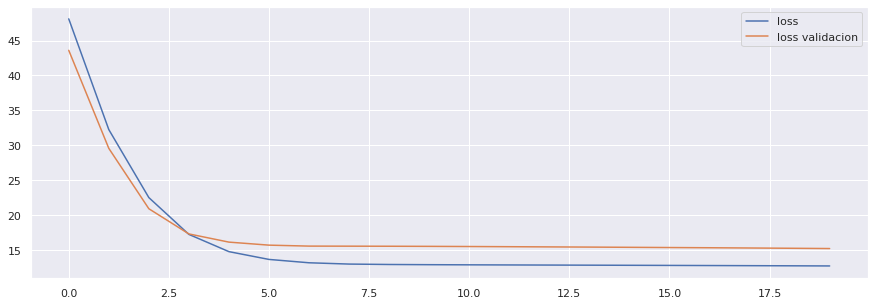

In [ ]:
mlp3 = MLP_03()
loss, lossv = train_model(mlp3,data_train,sales,epocas=20)
sns.lineplot(data=loss, label="loss")
sns.lineplot(data=lossv, label="loss validacion")

MAE:72.5875974382673, MAE-validacion:84.80960845947266
MAE:61.18720081874302, MAE-validacion:74.08372497558594
MAE:52.2733268737793, MAE-validacion:65.20238494873047
MAE:43.544263567243306, MAE-validacion:56.45840835571289
MAE:35.173893792288645, MAE-validacion:47.81858444213867
MAE:27.77818271092006, MAE-validacion:39.39967727661133
MAE:22.06958212171282, MAE-validacion:31.47598648071289
MAE:18.731412751334055, MAE-validacion:24.860605239868164
MAE:17.148283549717494, MAE-validacion:20.095090866088867
MAE:16.654354776654923, MAE-validacion:17.92084503173828
MAE:16.44827147892543, MAE-validacion:16.87840461730957
MAE:16.225574357169016, MAE-validacion:16.485517501831055
MAE:16.022844859531947, MAE-validacion:16.02368927001953
MAE:15.829263142177037, MAE-validacion:15.556692123413086
MAE:15.458156040736608, MAE-validacion:15.059666633605957
MAE:14.91199289049421, MAE-validacion:14.345198631286621
MAE:13.917195865086146, MAE-validacion:13.479360580444336
MAE:12.878958702087402, MAE-valid

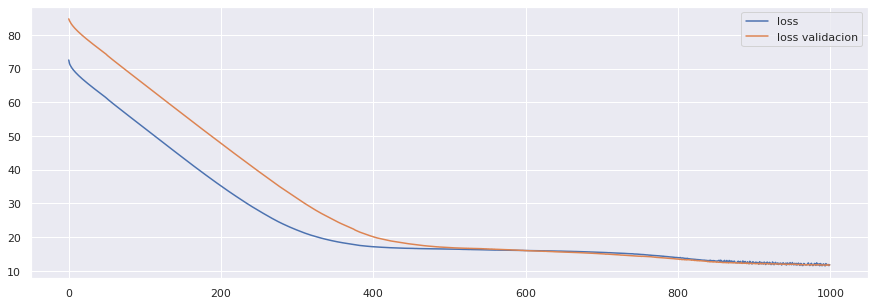

In [ ]:
mlp4 = MLP_04()
loss, lossv = train_model(mlp4,data_train,sales,epocas=1000)
sns.lineplot(data=loss, label="loss")
sns.lineplot(data=lossv, label="loss validacion")

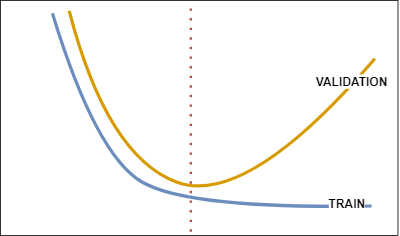

In [ ]:
mlp3.l1.weight.grad

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 8.7870,  8.5116,  8.1301,  7.4222],
        [14.0238, 13.5843, 12.9754, 11.8455],
        [-3.5065, -3.5865, -3.8288, -2.6264],
        [ 2.1483,  1.8421,  1.9726,  2.0110],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [13.4890, 13.0663, 12.4806, 11.3938]])

In [ ]:
mlp4.l1.weight.grad.min()

tensor(0.)

In [ ]:
np.average(np.abs(sales.values-sales.mean()))

In [ ]:
sns.lineplot(data=r3[-400:],label="r3")
sns.lineplot(data=sales.values[-400:],label="sales")

# Desafio

In [79]:
class MLP_10(nn.Module):
  def __init__(self,):
    super(MLP_10,self).__init__()
    self.l1 = nn.Linear(4,3)
    self.l2 = nn.Linear(3,2)
    self.l3 = nn.Linear(2,1)
  def forward(self,data):
    r1 = self.l1(data)
    r1 = torch.relu(r1)
    r2 = self.l2(r1)
    r2 = torch.relu(r2)
    r3 = self.l3(r2)
    r3 = torch.relu(r3)
    return r3

MAE:72.53692081996373, MAE-validacion:78.41301727294922
MAE:12.069237300327845, MAE-validacion:12.636575698852539


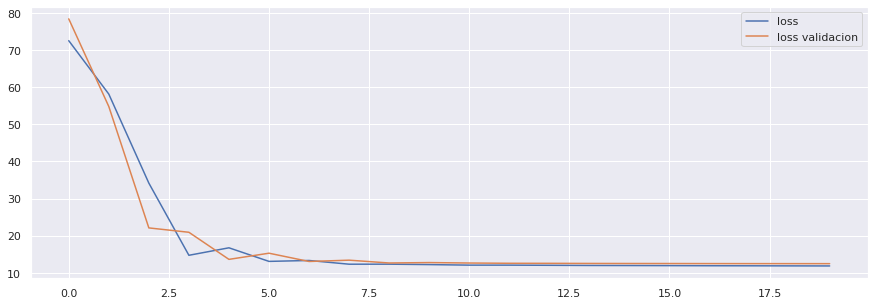

In [85]:
mlp10 = MLP_10()
loss, lossv = train_model(mlp10,data_train,sales,epocas=20)
sns.lineplot(data=loss, label="loss")
sns.lineplot(data=lossv, label="loss validacion")